In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [156]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [157]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

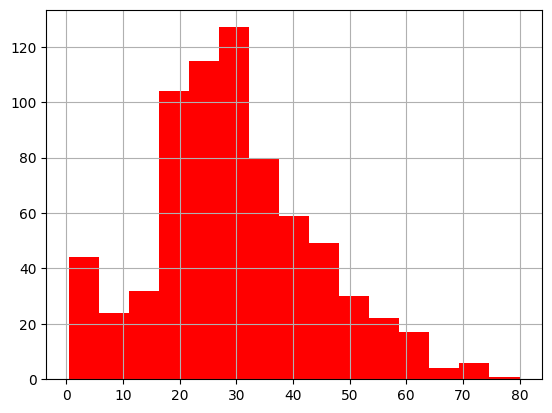

In [158]:
train_df['Age'].hist(bins=15, color='red')

In [159]:
train_df['Age'].median(skipna=True)

28.0

<Axes: xlabel='Embarked', ylabel='count'>

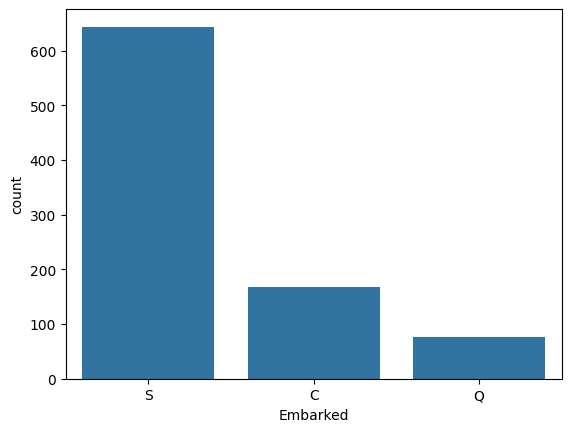

In [160]:
sns.countplot(x='Embarked', data = train_df)

In [161]:
train_data = train_df.copy()

In [162]:
train_data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [163]:
train_data['Age'] = train_data['Age'].fillna(train_df['Age'].median(skipna=True))

train_data['Embarked'] = train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax())

train_data.drop('Cabin', axis=1, inplace=True)
#train_data = train_data.drop('Cabin', axis=1)

In [164]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [165]:
train_data['travel_alone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0, 0, 1)

In [166]:
train_data = train_data.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [167]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [168]:
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Embarked', 'Sex', 'travel_alone'])

In [169]:
train_data = train_data.drop(['Sex_male', 'travel_alone_0'], axis=1)



In [170]:
train_data

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,travel_alone_1
0,0,22.0,7.2500,False,False,True,False,False,True,False,False
1,1,38.0,71.2833,True,False,False,True,False,False,True,False
2,1,26.0,7.9250,False,False,True,False,False,True,True,True
3,1,35.0,53.1000,True,False,False,False,False,True,True,False
4,0,35.0,8.0500,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,False,True,False,False,False,True,False,True
887,1,19.0,30.0000,True,False,False,False,False,True,True,True
888,0,28.0,23.4500,False,False,True,False,False,True,True,False
889,1,26.0,30.0000,True,False,False,True,False,False,False,True


In [171]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [172]:
test_data = test_df.copy()

In [173]:
test_data['Age'] = test_data['Age'].fillna(train_df['Age'].median(skipna=True))

test_data['Fare'] = test_data['Fare'].fillna(train_df['Fare'].median(skipna=True))

test_data.drop('Cabin', axis=1, inplace=True)

test_data['travel_alone'] = np.where((test_data['SibSp'] + test_data['Parch']) > 0, 0, 1)

test_data = test_data.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket'], axis=1)

test_data = pd.get_dummies(test_data, columns=['Pclass', 'Embarked', 'Sex', 'travel_alone'])

test_data = test_data.drop(['Sex_male', 'travel_alone_0'], axis=1)

test_data

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,travel_alone_1
0,34.5,7.8292,False,False,True,False,True,False,False,True
1,47.0,7.0000,False,False,True,False,False,True,True,False
2,62.0,9.6875,False,True,False,False,True,False,False,True
3,27.0,8.6625,False,False,True,False,False,True,False,True
4,22.0,12.2875,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
413,28.0,8.0500,False,False,True,False,False,True,False,True
414,39.0,108.9000,True,False,False,True,False,False,True,True
415,38.5,7.2500,False,False,True,False,False,True,False,True
416,28.0,8.0500,False,False,True,False,False,True,False,True


In [174]:
final_train = train_data.copy()
final_test = test_data.copy()

In [175]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'travel_alone_1'],
      dtype='object')

In [176]:
final_test.columns

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'travel_alone_1'],
      dtype='object')

In [177]:
feature_cols = final_test.columns

In [178]:
X = final_train[feature_cols]
y = final_train['Survived']

model = LogisticRegression()
logr = model.fit(X, y)



In [179]:
y_pred = logr.predict(X)
accuracy_score(y_pred, y)


0.7934904601571269

In [180]:
final_test.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,travel_alone_1
0,34.5,7.8292,False,False,True,False,True,False,False,True
1,47.0,7.0000,False,False,True,False,False,True,True,False
2,62.0,9.6875,False,True,False,False,True,False,False,True
3,27.0,8.6625,False,False,True,False,False,True,False,True
4,22.0,12.2875,False,False,True,False,False,True,True,False


In [181]:
final_test['Survived'] = logr.predict(final_test[feature_cols])


In [182]:
1 - final_train['Survived'].sum()/891

0.6161616161616161

In [183]:
final_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,travel_alone_1,Survived
0,34.5,7.8292,False,False,True,False,True,False,False,True,0
1,47.0,7.0000,False,False,True,False,False,True,True,False,0
2,62.0,9.6875,False,True,False,False,True,False,False,True,0
3,27.0,8.6625,False,False,True,False,False,True,False,True,0
4,22.0,12.2875,False,False,True,False,False,True,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,8.0500,False,False,True,False,False,True,False,True,0
414,39.0,108.9000,True,False,False,True,False,False,True,True,1
415,38.5,7.2500,False,False,True,False,False,True,False,True,0
416,28.0,8.0500,False,False,True,False,False,True,False,True,0


In [184]:
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept


(array([[-3.19560798e-02,  7.37859063e-04,  9.99265981e-01,
          1.21372078e-01, -1.16063991e+00,  1.73655776e-01,
          1.41323602e-01, -3.54981230e-01,  2.48801049e+00,
          4.79889798e-02]]),
 array([-0.05241433]))

## LogReg Metrics

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # random_state - це як np.random.seed
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [187]:
y_pred = model2.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [188]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [189]:
conf_matrix, accuracy, precision, recall, f1

(array([[140,  28],
        [ 27,  73]], dtype=int64),
 0.7947761194029851,
 0.7227722772277227,
 0.73,
 0.7263681592039801)

In [190]:
model2.predict_proba(X_test)

array([[0.85183929, 0.14816071],
       [0.91146352, 0.08853648],
       [0.7546955 , 0.2453045 ],
       [0.06106985, 0.93893015],
       [0.35773424, 0.64226576],
       [0.56104013, 0.43895987],
       [0.13809421, 0.86190579],
       [0.11298558, 0.88701442],
       [0.40488388, 0.59511612],
       [0.33671032, 0.66328968],
       [0.9113403 , 0.0886597 ],
       [0.26710618, 0.73289382],
       [0.85086421, 0.14913579],
       [0.11812996, 0.88187004],
       [0.05180899, 0.94819101],
       [0.3665054 , 0.6334946 ],
       [0.89757426, 0.10242574],
       [0.69028643, 0.30971357],
       [0.92800112, 0.07199888],
       [0.71656342, 0.28343658],
       [0.67113356, 0.32886644],
       [0.08249212, 0.91750788],
       [0.85086464, 0.14913536],
       [0.56100702, 0.43899298],
       [0.42781637, 0.57218363],
       [0.08754535, 0.91245465],
       [0.92129305, 0.07870695],
       [0.4279538 , 0.5720462 ],
       [0.19279827, 0.80720173],
       [0.29414633, 0.70585367],
       [0.

In [191]:
threshold = 0.6
y_pred_proba = model2.predict_proba(X_test)[:, 1] # беремо другий стовпчик який для 1-ць

In [192]:
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

In [193]:
y_pred_threshold

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [194]:
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

In [195]:
conf_matrix, accuracy, precision, recall, f1

(array([[154,  14],
        [ 38,  62]], dtype=int64),
 0.8059701492537313,
 0.8157894736842105,
 0.62,
 0.7045454545454546)

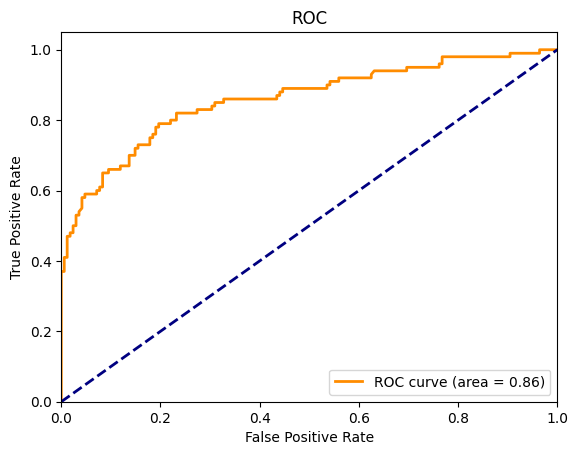

In [196]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = model2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [197]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [198]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

model_cv = LogisticRegression()
param_grid = {"C": [0.01, 0.01, 0.1, 1, 10, 100],
              "penalty": ["l1", "l2", "elasticnet"],
              "max_iter": [100, 1000, 10000]}

grid_search = GridSearchCV(estimator=model_cv, param_grid=param_grid, cv=skf, scoring="precision")

In [199]:
grid_search.fit(X_train, y_train)
print("best_params: ", grid_search.best_params_)
print("best_params: ", grid_search.best_estimator_)

c:\Users\yulic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yulic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

best_params:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
best_params:  LogisticRegression(C=0.1)


In [200]:
print("best_params: ", grid_search.best_params_)
print("best_params: ", grid_search.best_estimator_)

best_params:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
best_params:  LogisticRegression(C=0.1)


In [201]:
y_pred = grid_search.predict(X_test)

In [202]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [203]:
conf_matrix, accuracy, precision, recall, f1

(array([[145,  23],
        [ 33,  67]], dtype=int64),
 0.7910447761194029,
 0.7444444444444445,
 0.67,
 0.7052631578947368)

# Lesson code practice from lector:

## Log reg with train_test_split

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [206]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, conf_matrix, precision, recall, f1

(0.7947761194029851,
 array([[140,  28],
        [ 27,  73]], dtype=int64),
 0.7227722772277227,
 0.73,
 0.7263681592039801)

## Change threshold

In [207]:
threshold = 0.8
y_pred_proba = model2.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

In [208]:
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
precision_threshold = precision_score(y_test, y_pred_threshold)
recall_threshold = recall_score(y_test, y_pred_threshold)
f1_threshold = f1_score(y_test, y_pred_threshold)

accuracy_threshold, conf_matrix_threshold, precision_threshold, recall_threshold, f1_threshold

(0.7686567164179104,
 array([[167,   1],
        [ 61,  39]], dtype=int64),
 0.975,
 0.39,
 0.5571428571428572)

## ROC-AUC

In [209]:

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

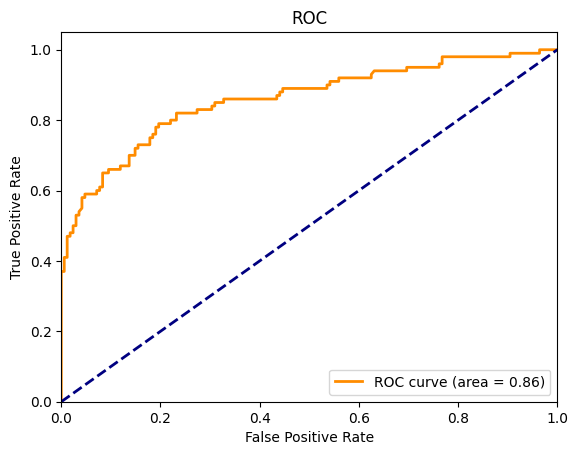

In [210]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## GridSearchCV + Stratified K-Fold

In [211]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet']}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=skf, scoring='precision')
grid_search.fit(X, y)

print("Best params:", grid_search.best_params_)
print("Best result:", grid_search.best_score_)

Best params: {'C': 0.01, 'penalty': 'l2'}
Best result: 0.7933993729060143


c:\Users\yulic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yulic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [212]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, conf_matrix, precision, recall, f1

(0.753731343283582,
 array([[157,  11],
        [ 55,  45]], dtype=int64),
 0.8035714285714286,
 0.45,
 0.5769230769230769)

## SVM

In [213]:
from sklearn.svm import SVC

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model_cvm = SVC()
model_cvm.fit(X_train, y_train)
y_pred = model_cvm.predict(X_test)

In [215]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, conf_matrix, precision, recall, f1

(0.7164179104477612,
 array([[160,   8],
        [ 68,  32]], dtype=int64),
 0.8,
 0.32,
 0.45714285714285713)

In [216]:
from sklearn.model_selection import GridSearchCV

svm = SVC(max_iter=1000000)
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000],
              "kernel": ["rbf", "poly", "linear", "sigmoid"],
              "gamma": [1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5) # n_jobs=-1)
grid_search.fit(X_train, y_train)

c:\Users\yulic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\yulic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\yulic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\yulic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

GridSearchCV(cv=5, estimator=SVC(max_iter=1000000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 10, 100, 1000],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [217]:
grid_search.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [218]:
y_pred_svm = grid_search.predict(X_test)

In [219]:
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

accuracy, conf_matrix, precision, recall, f1

(0.7873134328358209,
 array([[140,  28],
        [ 29,  71]], dtype=int64),
 0.7171717171717171,
 0.71,
 0.7135678391959799)

### Decision tree

In [220]:
from sklearn import tree

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

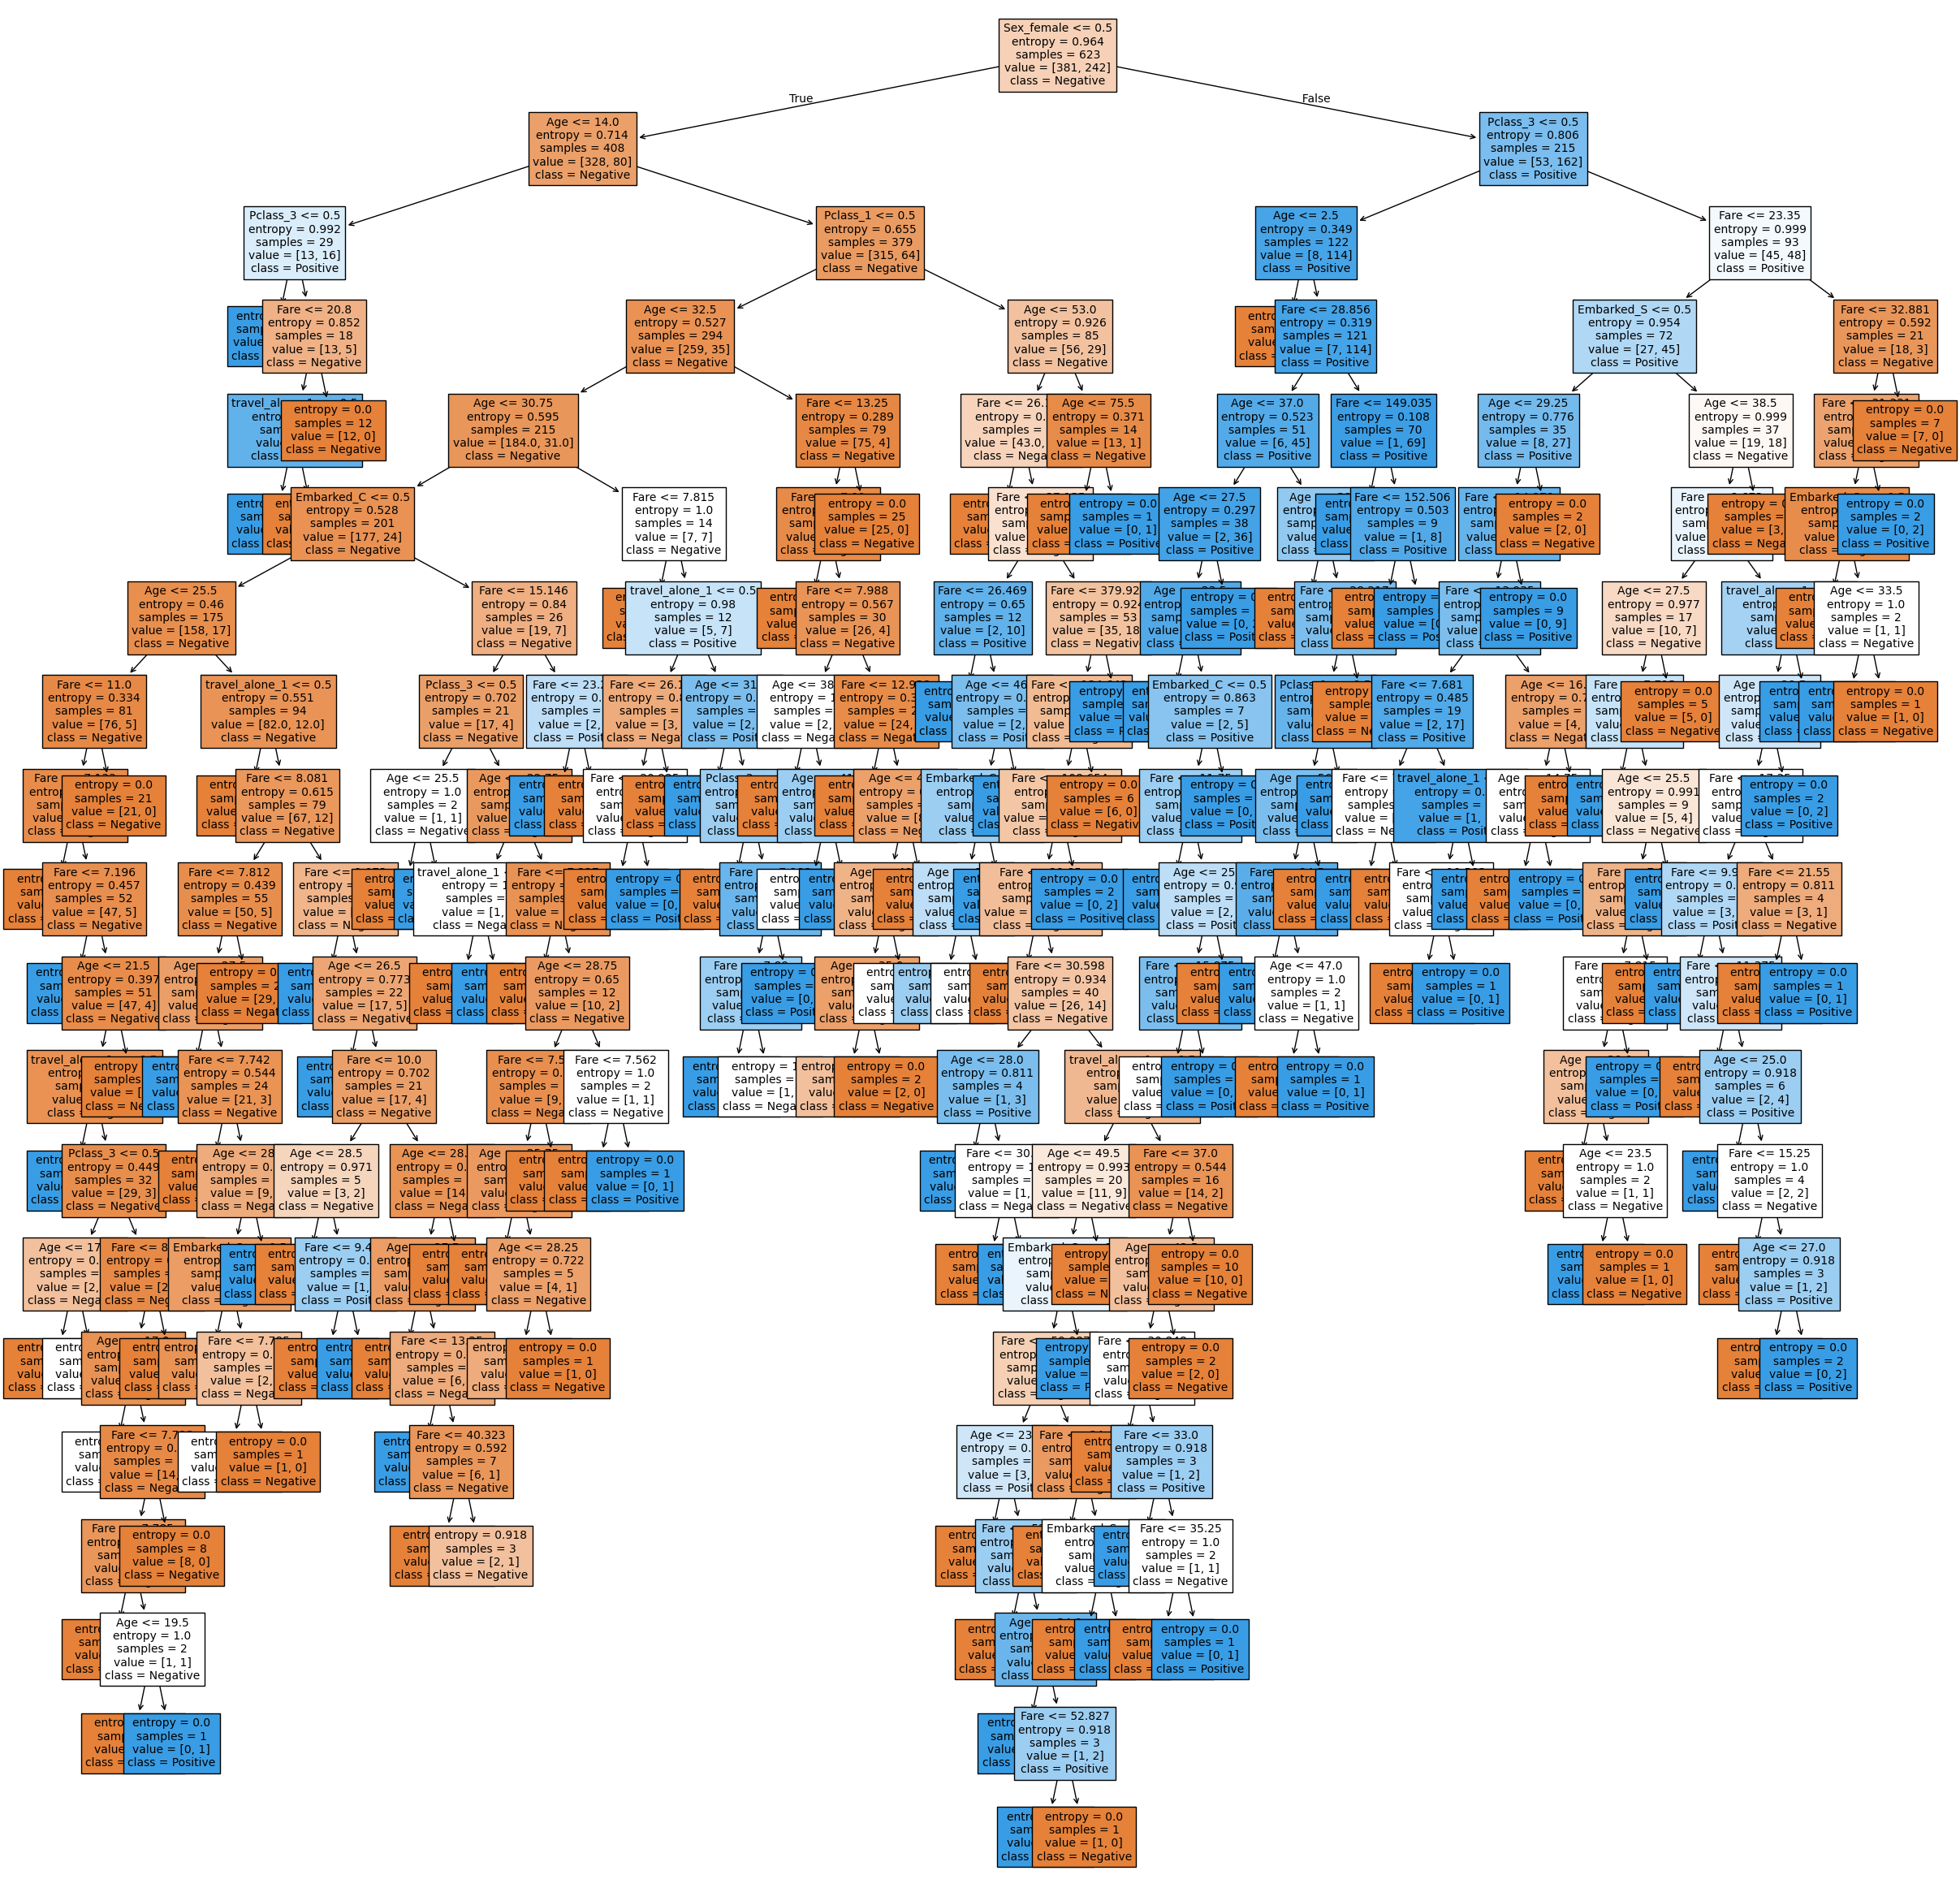

In [222]:
plt.figure(figsize=(30, 30))
tree.plot_tree(clf_tree, feature_names=list(X),
               class_names=["Negative", "Positive"],
               filled=True, fontsize=10)
plt.show()

In [223]:
clf_tree.score(X_train, y_train)

0.9791332263242376

In [224]:
clf_tree.score(X_test, y_test)

0.7910447761194029

In [225]:
clf_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

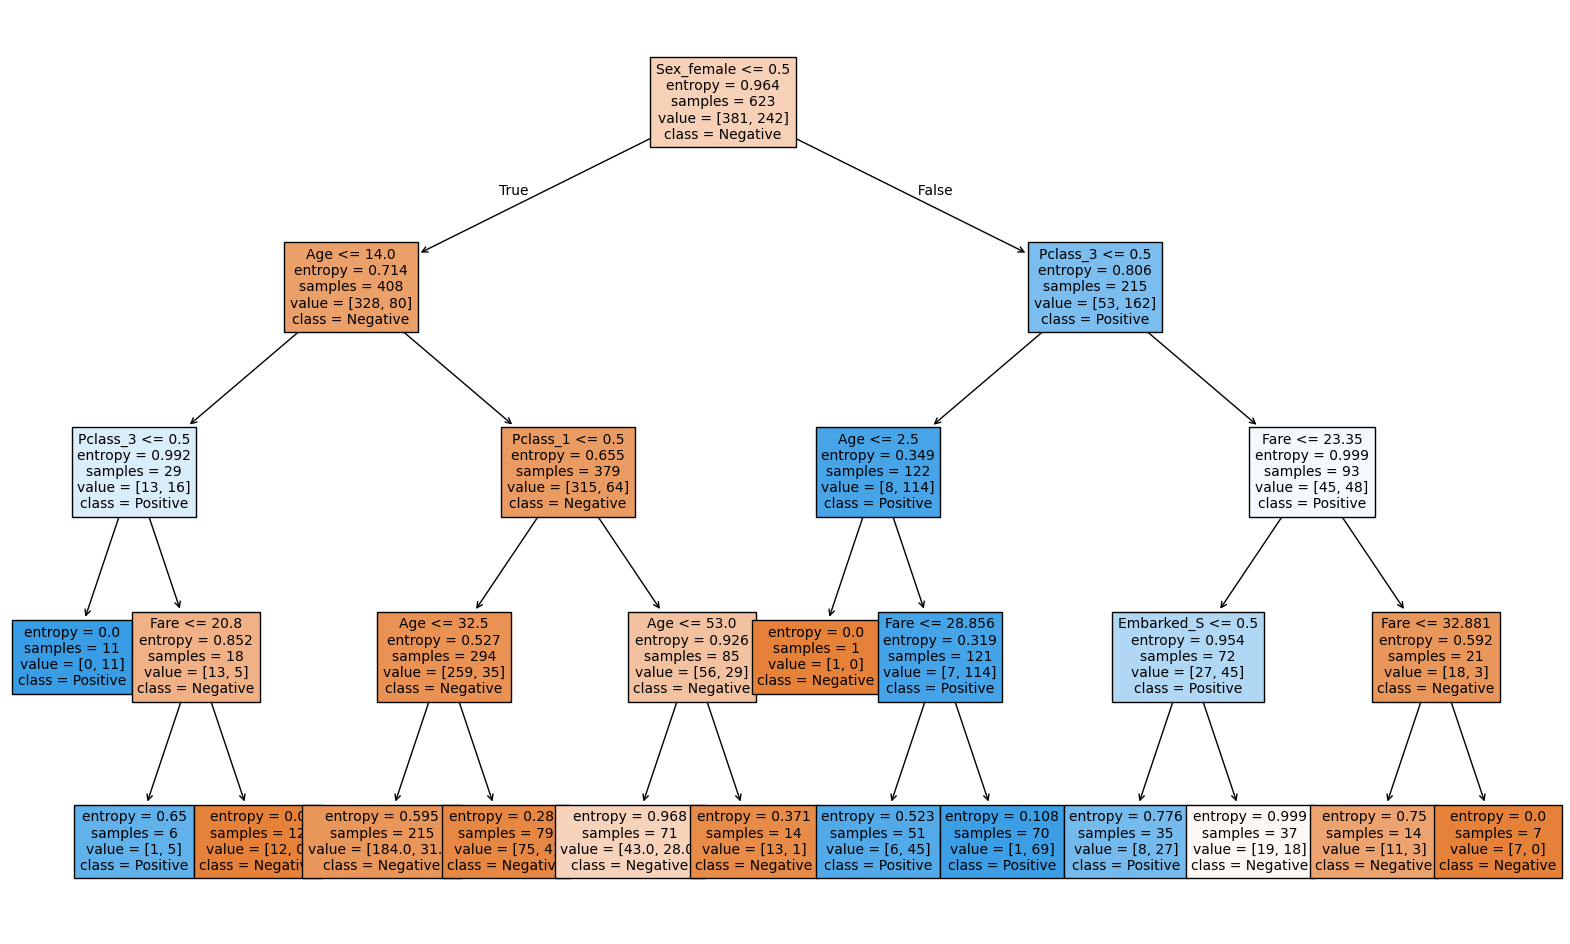

In [226]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_tree, feature_names=list(X),
               class_names=["Negative", "Positive"],
               filled=True, fontsize=10)
plt.show()

In [227]:
clf_tree.score(X_train, y_train)

0.8378812199036918

In [228]:
clf_tree.score(X_test, y_test)

0.8208955223880597

In [229]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({"max_depth": [max_depth], "train_score": [train_score], "test_score": [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [230]:
scores_data

,max_depth,train_score,test_score
0,1,0.786517,0.787313
0,2,0.791332,0.787313
0,3,0.829856,0.809701
0,4,0.837881,0.820896
0,5,0.850722,0.824627
...,...,...,...
0,95,0.979133,0.809701
0,96,0.979133,0.805970
0,97,0.979133,0.794776
0,98,0.979133,0.805970


<Axes: xlabel='max_depth', ylabel='score'>

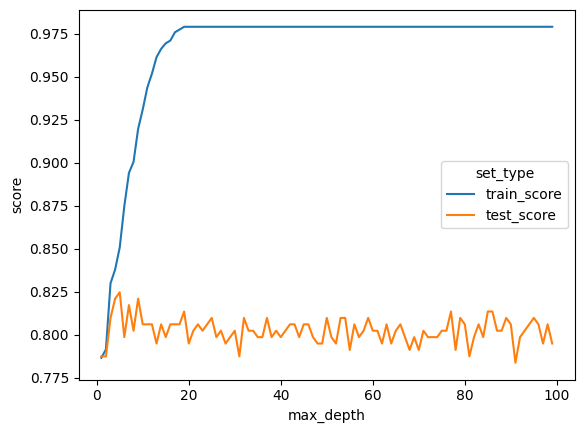

In [231]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"],
                           value_vars=["train_score", "test_score"],
                           var_name="set_type",
                           value_name="score")

sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [232]:
clf_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

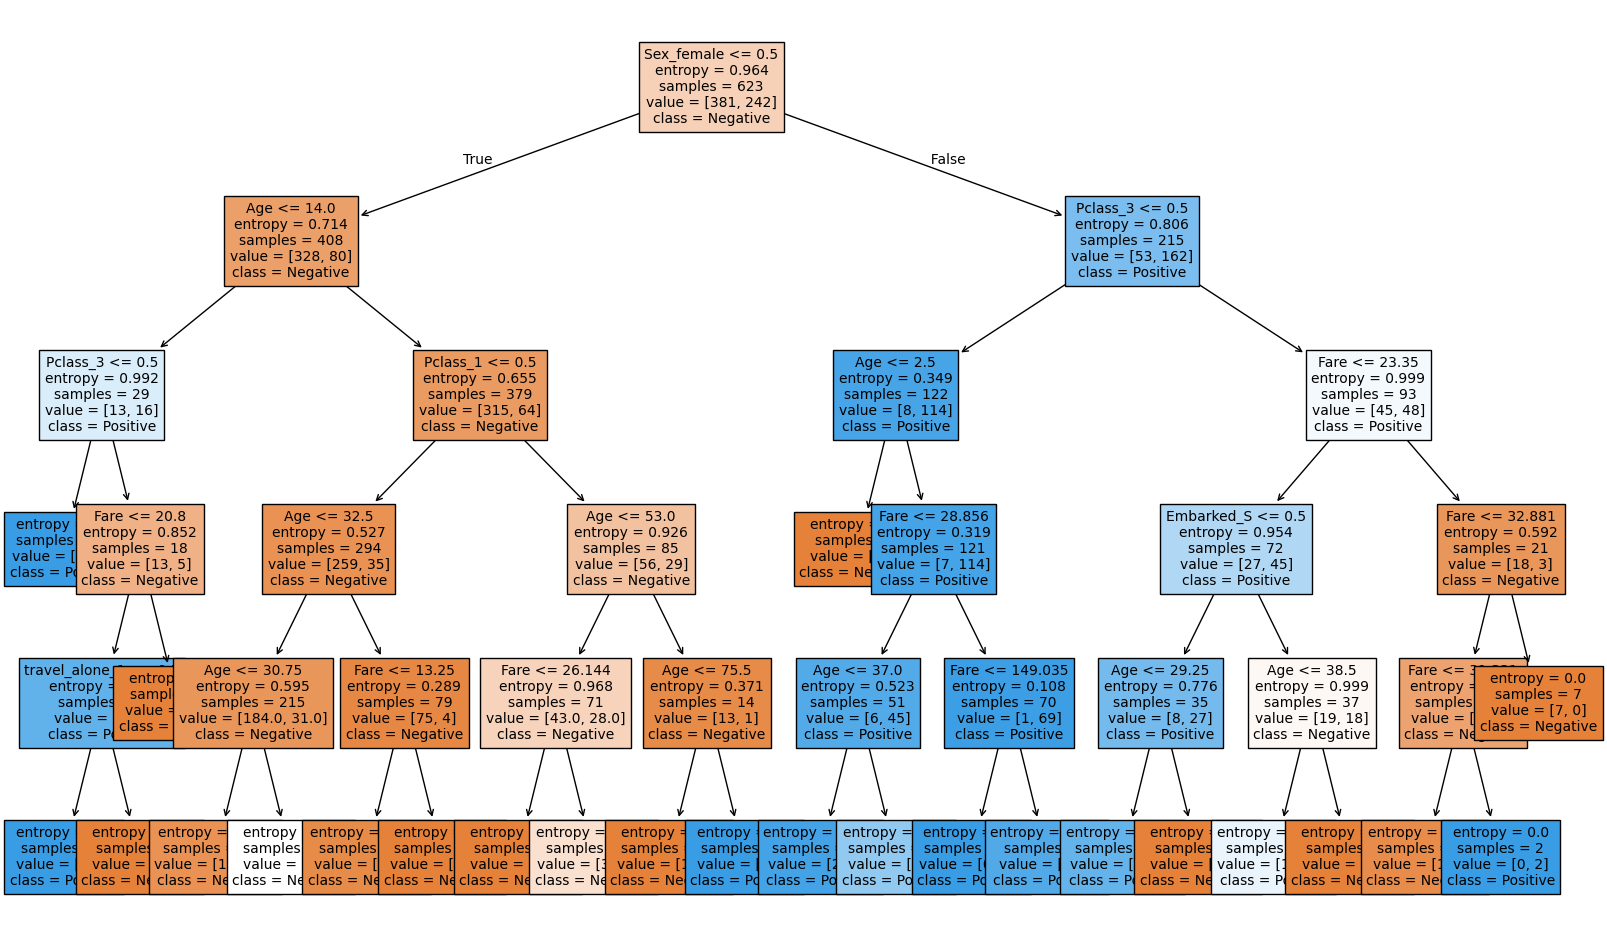

In [233]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_tree, feature_names=list(X),
               class_names=["Negative", "Positive"],
               filled=True, fontsize=10)
plt.show()

In [ ]:
# pip install lazypredict-nightly

In [ ]:
from lazypredict import LazyClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=123)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


In [5]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.99,0.99,0.99,0.99,0.00
Perceptron,0.99,0.98,0.98,0.99,0.01
LogisticRegression,0.99,0.98,0.98,0.99,0.01
XGBClassifier,0.98,0.98,0.98,0.98,0.03
SVC,0.98,0.98,0.98,0.98,0.01
LabelPropagation,0.98,0.97,0.97,0.98,0.01
LabelSpreading,0.98,0.97,0.97,0.98,0.01
BaggingClassifier,0.97,0.97,0.97,0.97,0.02
PassiveAggressiveClassifier,0.98,0.97,0.97,0.98,0.01


In [ ]:
predictions